# Amazon AWS SaaS Sales Dataset

---


This notebook is written to fulfill the requirements of the second capstone task, which involves the development of data analysis. Through this capstone project, we as students of the Data Science program at Purwadhika, assume the role of a data analyst in a company. We're given the opportunity to formulate a series of questions based on business needs and challenges that the relevant company may face, using the provided dataset.

By **Az Zahra Syahida**, JCDS 2204

---

## Company Background

AWS or Amazon Web Services was founded in 2006. AWS offers various products and services covering various fields, including cloud computing. The three primary cloud computing models on AWS are Infrastructure as a Service (IaaS), Platform as a Service (PaaS), and Software as a Service (SaaS). With the combination of these three cloud computing models, AWS provides users with the flexibility and scalability to meet their IT needs in an efficient and cost-effective manner.

Now, focusing on AWS SaaS. Software as a Service (SaaS) is a cloud-based software model that delivers applications to customers via the internet. In this model, SaaS vendors host and manage services and applications that can be accessed by customers on-demand. With SaaS, customers no longer need to worry about maintaining the service or managing the underlying infrastructure; their main focus is utilizing the software. Another characteristic of the SaaS model is the pricing structure, which often involves subscription-based or pay-as-you-go models, rather than purchasing all the functionality at once. A common example of a SaaS application is Amazon WorkDocs, a document editing service. With Amazon WorkDocs, customers can securely store, share, and collaborate on documents in the cloud.

## Determained the stakeholder

---

In this capstone project, I've determined that the stakeholder is the product development team.


## Driving Product Innovation: Overcoming Obstacles and Setting Goals


### Obstacles

1. How customer preferences and understanding sales patterns contribute to the optimization of development products?

2. In what way does addressing customer needs and purchasing decisions guide the development team in improving products?

3. How does industry-specific demands effectively?


### Goals

1. Optimize Development Cycles and Prioritize Features.

    Align product development with peak demand by identifying customer preferences and understanding sales patterns.

2. Enhance Product Value Based on Customer Needs.

    Guide the development team in creating value-added features by identifying and addressing customer needs and purchasing decisions.

3. Tailor Solutions to Industry Demands Effectively.

    Utilize industry background and customer segments data to customize solutions, allowing the team to efficiently meet industry-specific demands.

# Data Preparation

## Dataset

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,spearmanr
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head())
len(df)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


9994

This dataset comprises transactional information from an imaginary SaaS (Software as a Service) firm specializing in sales and marketing software for business-to-business (B2B) interactions. Each row in the dataset corresponds to a product within a transaction, with columns encompassing various details, as outlined in the table below.



| No.  | Field Name      | Description                                      |
|------|-----------------|--------------------------------------------------|
| 1    | Row ID          | A unique identifier for each transaction.        |
| 2    | Order ID        | A unique identifier for each order.              |
| 3    | Order Date      | The date when the order was placed.              |
| 4    | Date Key        | A numerical representation of the order date (MMDDYYYY).|
| 5    | Contact Name    | The name of the person who placed the order.     |
| 6    | Country         | The country where the order was placed.          |
| 7    | City            | The city where the order was placed.             |
| 8    | Region          | The region where the order was placed.           |
| 9    | Subregion       | The subregion where the order was placed.        |
| 10   | Customer        | The name of the company that placed the order.   |
| 11   | Customer ID     | A unique identifier for each customer.           |
| 12   | Industry        | The industry the customer belongs to.            |
| 13   | Segment         | The customer segment (SMB, Strategic, Enterprise, etc.).|
| 14   | Product         | The product that was ordered.                    |
| 15   | License         | The license key for the product.                 |
| 16   | Sales           | The total sales amount for the transaction.      |
| 17   | Quantity        | The total number of items in the transaction.    |
| 18   | Discount        | The discount applied to the transaction.         |
| 19   | Profit          | The profit from the transaction.                 |


## Data Checks and Data Cleaning

### Data Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [6]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df['City'].unique()

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

In [8]:
df['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [9]:
df['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

> After conducting data checks, the dataset is free from missing data and duplicates.

### Outlier Checking

---

**Purpose:** To identify and categorize outliers in various numerical columns related to sales data.

In [12]:
num_cols = ['Discount', 'Profit', 'Quantity', 'Sales', 'Product']

>*Data Selection:*
  - The numerical columns selected for outlier analysis include 'Discount', 'Profit', 'Quantity', and 'Sales'.
  - The 'Product' column is also included for grouping.

In [13]:
num_data = df[num_cols]
Q1 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.25)
Q3 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


>*Outlier Identification:*
  - Calculated the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each numerical column.
  - Defined upper and lower bounds using the 1.5*IQR rule.
  - Created boolean masks to identify positive and negative outliers for each row.

In [14]:
outliers_positive_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] > upper_bound).any(axis=1)
outliers_negative_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] < lower_bound).any(axis=1)


>*Outlier Categorization:*
  - Introduced a new column 'Outlier_Type' initially set as 'No Outlier'.
  - Updated 'Outlier_Type' based on the outlier masks:
    - 'Positive Outlier' for values above the upper bound.
    - 'Negative Outlier' for values below the lower bound.

In [15]:
df['Outlier_Type'] = 'No Outlier'
df.loc[outliers_positive_mask, 'Outlier_Type'] = 'Positive Outlier'
df.loc[outliers_negative_mask, 'Outlier_Type'] = 'Negative Outlier'


>*Outlier Percentage by Product:*
  - Grouped the data by 'Product' and 'Outlier_Type' to count occurrences.
  - Calculated the percentage of each outlier type for each product.
  - The result is presented in a tabular format with 'Negative Outlier', 'No Outlier', and 'Positive Outlier' as the columns.

In [16]:
outlier_percentage_by_product = df.groupby(['Product', 'Outlier_Type']).size().unstack(fill_value=0)
outlier_percentage_by_product = outlier_percentage_by_product.div(outlier_percentage_by_product.sum(axis=1), axis=0) * 100


In [17]:
print("Percentage of each 'Outlier Type' for each 'Product':")
outlier_percentage_by_product

Percentage of each 'Outlier Type' for each 'Product':


Outlier_Type,Negative Outlier,No Outlier,Positive Outlier
Product,,,
Alchemy,0.000000,4.411765,95.588235
Big Ol Database,29.565217,15.652174,54.782609
ChatBot Plugin,0.000000,97.864322,2.135678
ContactMatcher,13.192182,47.557003,39.250814
Data Smasher,0.387097,77.548387,22.064516
FinanceHub,7.441386,68.195719,24.362895
Marketing Suite,25.877193,49.561404,24.561404
Marketing Suite - Gold,6.146572,74.704492,19.148936
OneView,9.012876,63.519313,27.467811


- **Output Interpretation:**

  - For each product, the table shows the percentage distribution of negative outliers, no outliers, and positive outliers in the selected numerical columns.
  - Products like `'ChatBot Plugin'` and `'Storage'` have a high percentage of 'No Outlier', indicating relatively stable performance.
  - `'Alchemy'` has a significant percentage of 'Positive Outlier', suggesting potential high-performing sales in certain instances.
  - `'Big Ol Database'` has the highest percentage of negative outliers at around 29.57%, indicating poor performance or instability in some sales cases for the product.

### Check Data Distribution

---

**Purpose:** To understand how sales are spread across different products and if there are any unusual patterns. This information will help products development teams plan products better, manage inventory, and decide where to focus resources, so our products can meet customer needs and be successful.

In [18]:
columns_of_interest = ['Sales', 'Quantity', 'Discount', 'Profit']

In [19]:
alpha = 0.05


Shapiro-Wilk Test for Normality (Sales):
  p-value: 0.0
  The distribution of Sales is likely not normal.


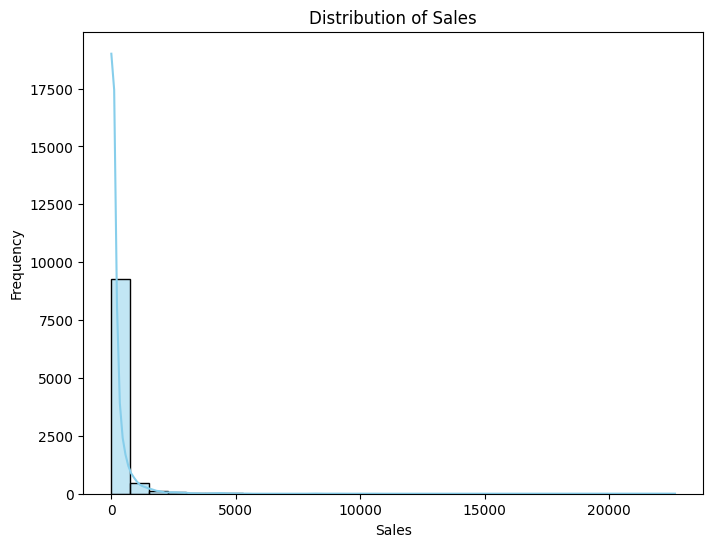


Shapiro-Wilk Test for Normality (Quantity):
  p-value: 0.0
  The distribution of Quantity is likely not normal.


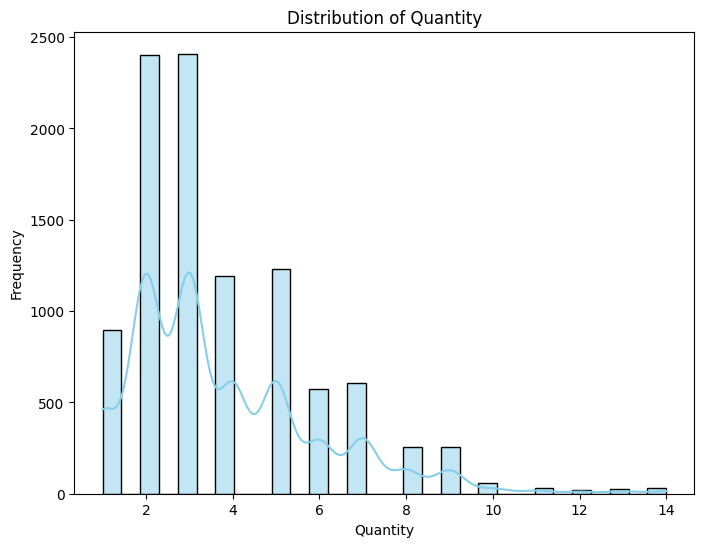


Shapiro-Wilk Test for Normality (Discount):
  p-value: 0.0
  The distribution of Discount is likely not normal.


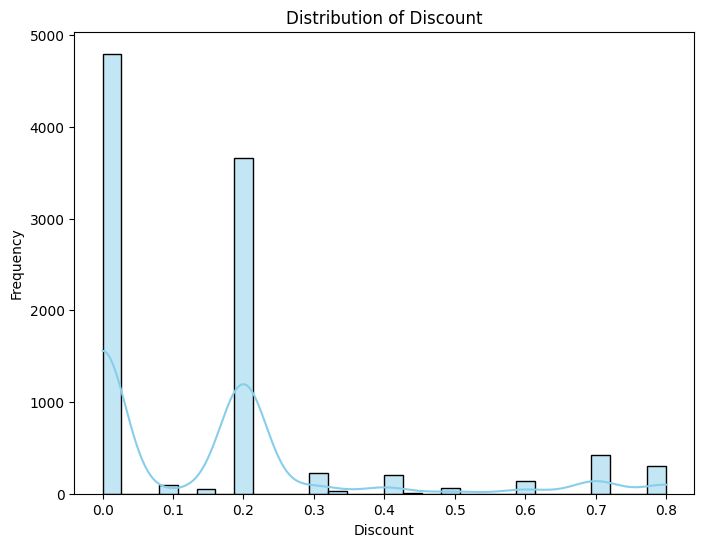


Shapiro-Wilk Test for Normality (Profit):
  p-value: 0.0
  The distribution of Profit is likely not normal.


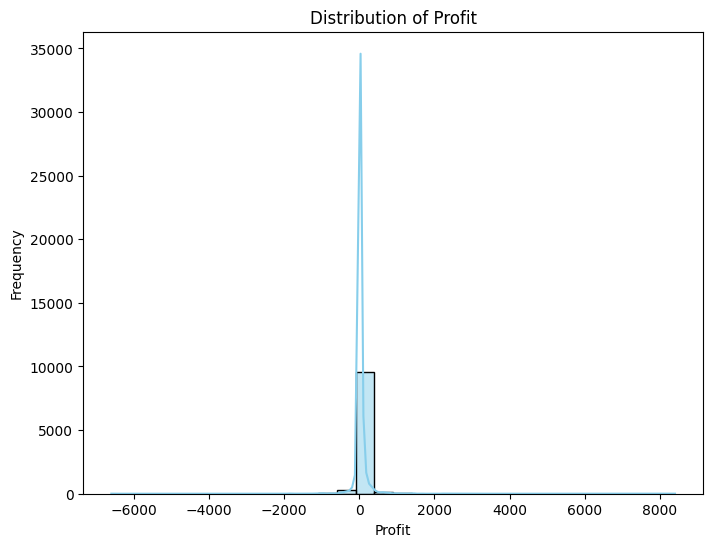

In [20]:
for column_of_interest in columns_of_interest:
    # Extract the column for analysis
    data = df[column_of_interest]

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data)

    # Print the result of the Shapiro-Wilk test
    print(f"\nShapiro-Wilk Test for Normality ({column_of_interest}):")
    print(f"  p-value: {p_value}")

    # Check if the p-value is less than the significance level
    if p_value > alpha:
        print(f"  The distribution of {column_of_interest} is likely normal.")
    else:
        print(f"  The distribution of {column_of_interest} is likely not normal.")

    # Visualize the distribution with a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column_of_interest}')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')
    plt.show()

### Convert string into datetime

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

> *Data Type Conversion:*
  - The `Order Date` column in the original DataFrame (`df`) is converted from a string format to a datetime format using `pd.to_datetime`.

# **Analyzing Sales Effectiveness**

## **1.Product Sales Performance Analysis**

---

Purpose :

To analyze the performance of products and provide insights from the perspective of median sales, aligning with the requirements of the product development team.

In [22]:
ps_median = df.groupby(['Product'])['Sales'].median().reset_index()

In [23]:
sales_summary = ps_median.sort_values(by='Sales', ascending=False).reset_index(drop=True)

>*Data Processing:*

  - Grouped data by 'Product' and calculated the median sales for each product.
  - Sorted the products based on average sales in descending order.

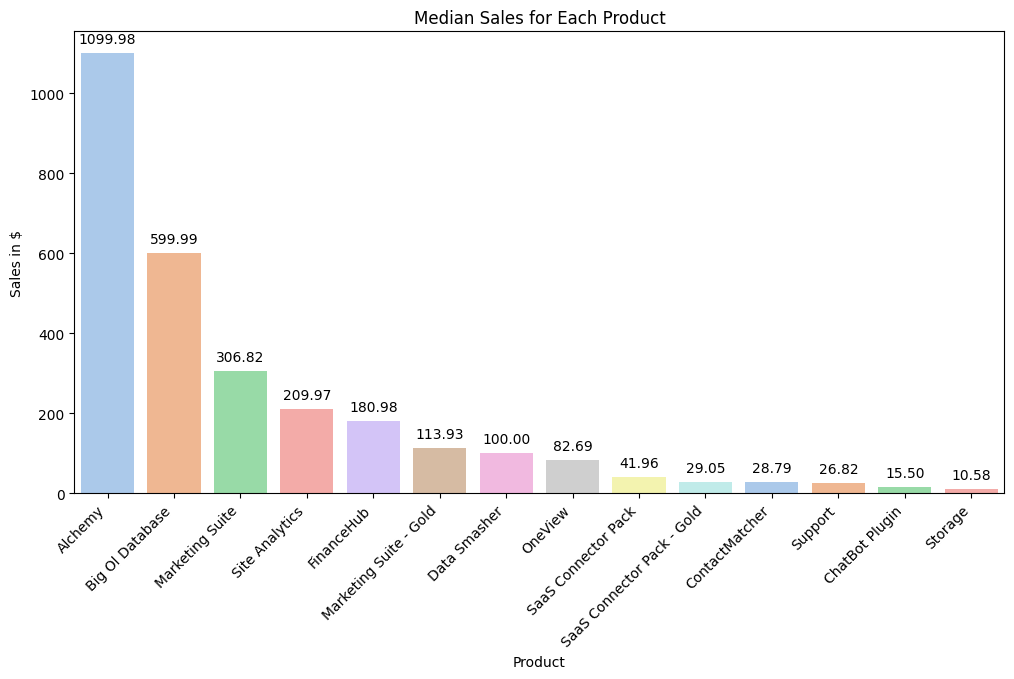

In [24]:
colors = sns.color_palette("pastel")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product', y='Sales', data=sales_summary, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Median Sales for Each Product')
plt.xlabel('Product')
plt.ylabel('Sales in $')
plt.xticks(rotation=45, ha='right')
plt.show()

>*Visualization:*

  - Utilized a bar chart to represent each product and its corresponding average sales.

- **Output Interpretation:**

    1. High-performing products like `Alchemy, Big Ol Database, and Marketing Suite` demonstrate strong market success and popularity due to their robust sales.

    2. Products such as `Saas Connector Pack - Gold, ChatBot Plugin, and Storage`, with lower average sales, indicate potential areas for improvement or strategic adjustments to enhance their performance.

## **2.Analyzing Sales Patterns Over Time**

---

Purpose : 

To examine sales patterns over time, catering to the interests and needs of the product development team.

In [25]:
df['Order Date']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [26]:
df['Year'] = df['Order Date'].dt.strftime('%Y').astype(str)
df['Year-Month'] = df['Order Date'].dt.to_period('M')
df['Year-Month'] = df['Year-Month'].astype(str)


> Data Preparation:

Extracts the month and year from the 'Order Date' column, creating separate columns for easier analysis.

In [27]:
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

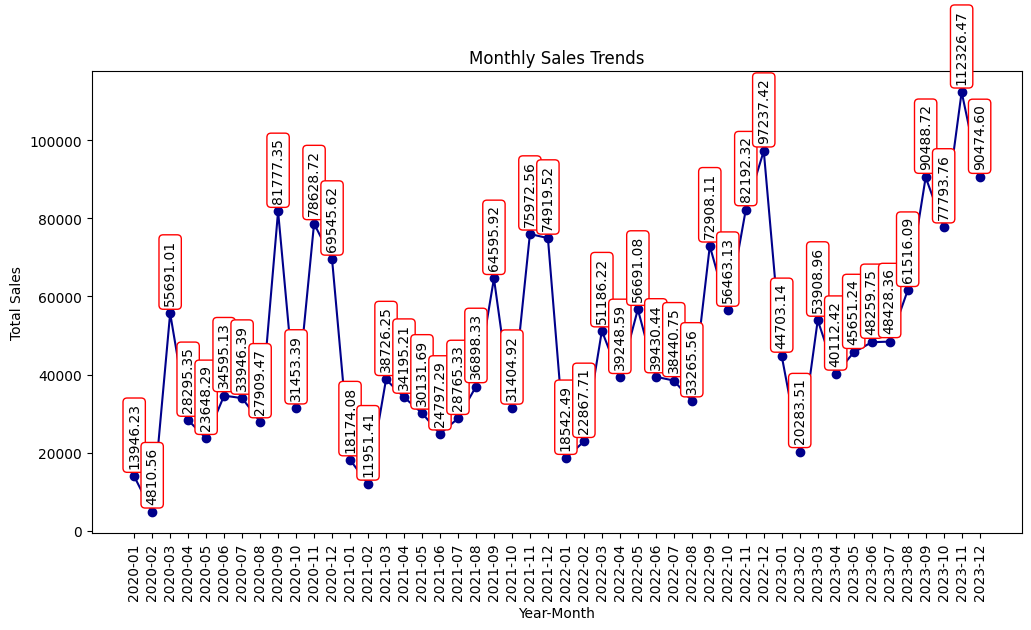

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o', color='darkblue')

# Adding annotations for each point 
for i, txt in enumerate(monthly_sales['Sales']):
    plt.annotate('{:.2f}'.format(txt), (monthly_sales['Year-Month'][i], monthly_sales['Sales'][i]),
                 textcoords="offset points", xytext=(0, 8), ha='center', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')

plt.xticks(rotation=90)

plt.show()

>Monthly Sales Trends:

Groups the data by month, calculating the total sales for each month.

In [29]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

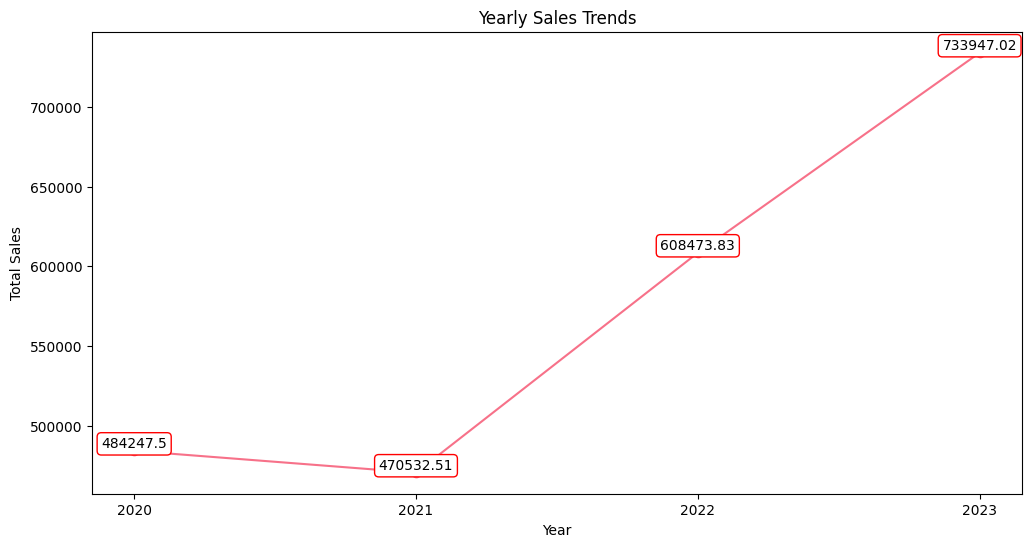

In [30]:
custom_palette = sns.color_palette("husl", 4)
plt.figure(figsize=(12, 6))
line_chart = plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', color=custom_palette[0])

# Adding annotations for each point
for i, (x, y) in enumerate(zip(yearly_sales['Year'], yearly_sales['Sales'])):
    plt.text(x, y, round(y, 2), ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

>Yearly Sales Trends:

Groups the data by year, calculating the total sales for each year.

- **Output Interpretation:**
    - Monthly Sales Trends:
    The monthly sales data from January 2020 to December 2023 indicates varying trends, with significant increases observed in specific months, occasional decreases in others, and consistently _higher sales performance often occurring towards the end of the year_.
    - Yearly Sales Trends:
    The yearly sales data demonstrates _consistent growth_ from 2020 to 2023, with a notable _peak in 2023_.

## **3. Product Performance Insight**

---

Purpose:

To provide the product development team with valuable data-driven insights into customer preferences and frequent purchasing behavior. 

In [31]:
def custom_mode(series):
    return series.mode()[0] if not series.mode().empty else None


> *Define Custom Mode Function:*
   - Create a custom function to calculate the mode of categorical data ('Country', 'Segment', 'Industry') for each customer.

In [32]:
customer_info = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Country': custom_mode,
    'Segment': custom_mode,
    'Industry': custom_mode
}).reset_index()
customer_info

,Customer ID,Sales,Country,Segment,Industry
0,1001,12617.1140,United States,Strategic,Healthcare
1,1002,27278.5930,United States,SMB,Healthcare
2,1003,39941.6400,United States,SMB,Finance
3,1004,23189.2165,United States,SMB,Tech
4,1005,33514.9210,United States,Strategic,Finance
...,...,...,...,...,...
94,1097,29483.0050,Japan,Strategic,Communications
95,1098,22650.8206,United Kingdom,SMB,Transportation
96,1099,23180.5442,United Kingdom,SMB,Finance
97,1100,33447.1270,United Kingdom,SMB,Finance


>*Aggregate Customer Information:*

   - Group data by 'Customer ID' and aggregate information including total 'Sales' and the mode of categorical attributes.

In [33]:
loyalty = customer_info.sort_values(by='Sales', ascending=False)

In [34]:
top3_customers = loyalty.nlargest(3, 'Sales')


>*Identify Top 3 Loyal Customers:*

   - Sort customers based on 'Sales' in descending order and select the top 3 as the most loyal customers.

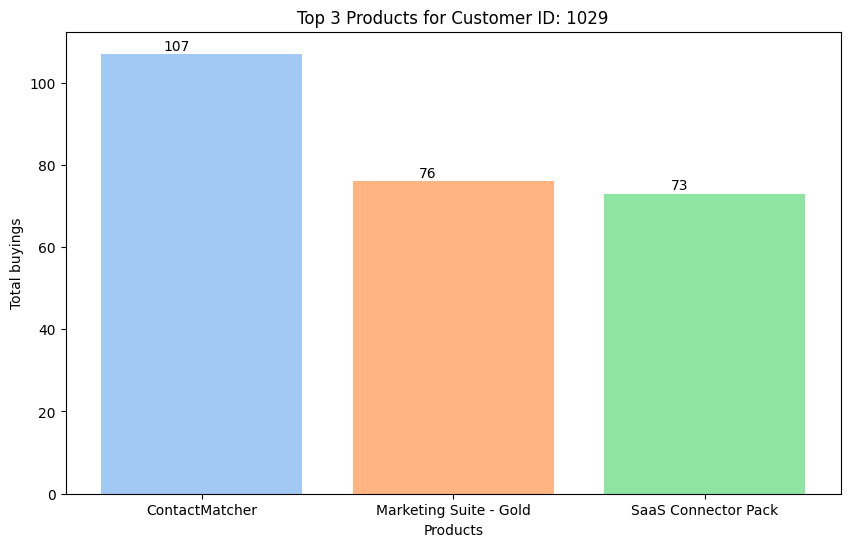

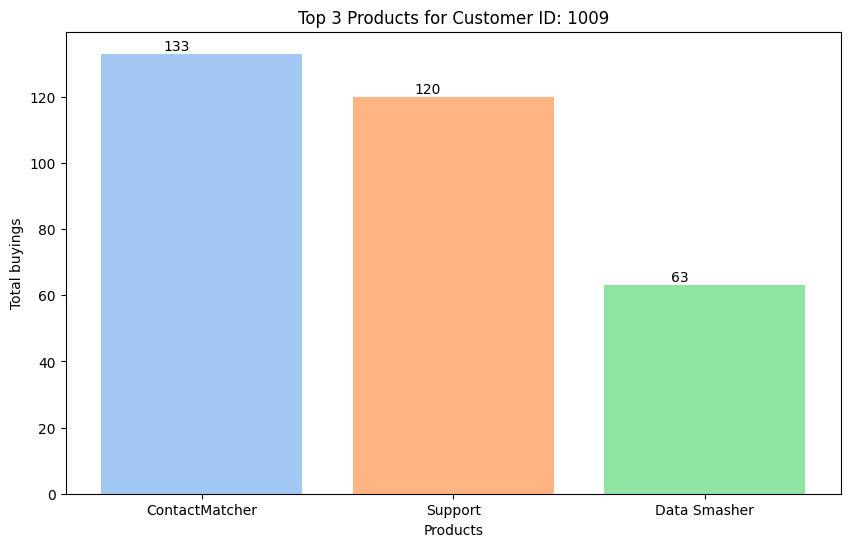

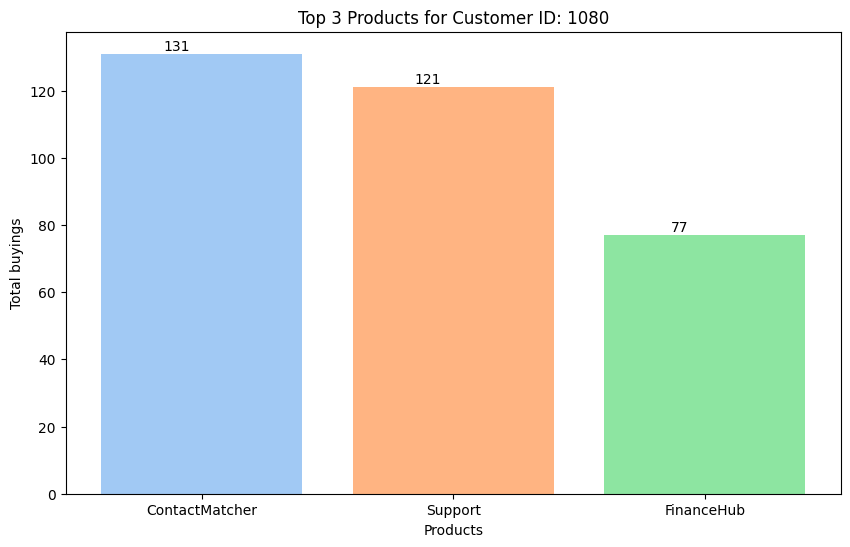

In [35]:
pastel_colors = sns.color_palette("pastel", n_colors=3)


for customer_id in top3_customers['Customer ID']:
    customer_data = df[df['Customer ID'] == customer_id]
    
    top_products = customer_data.groupby('Product')['Quantity'].sum().nlargest(3).reset_index()
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_products['Product'], top_products['Quantity'], color=pastel_colors)
    
    for bar, value in zip(bars, top_products['Quantity']):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.2, str(value), ha='center', va='bottom', color='black')

    plt.xlabel('Products')
    plt.ylabel('Total buyings')
    plt.title(f"Top 3 Products for Customer ID: {customer_id}")
    
    plt.show()

> *Visualization Output:*
   - Display the bar charts for the top 3 customers showing their most purchased products.

In [36]:
loyalty.head(3)

,Customer ID,Sales,Country,Segment,Industry
28,1029,55719.2100,United States,SMB,Healthcare
8,1009,43893.0424,United States,SMB,Manufacturing
77,1080,42904.1670,United States,SMB,Finance


- **Output Insights:**

1. **Key Products for Top Loyal Customers:**
   - ContactMatcher is consistently popular among the top customers, highlighting its importance and suggesting a need for continuous improvement and optimization.
   - Support-related products, such as Support and Data Smasher, play a crucial role in meeting the preferences of loyal customers, emphasizing the significance of robust customer support solutions.
   
2. **Common Traits Across Customers:**
   - **Location:** All three customers are based in the United States.
   - **Segment:** They belong to the SMB (Small and Medium-sized Business) segment.
   - **Industry:** Diverse industries - Healthcare, Manufacturing, and Finance.

# **Profit Analysis**

## **1.Profit Trendspotting**

---

Purpose :

Delving into the profit dynamics of products, spotlighting opportunities and areas for improvement in the product lineup.

In [37]:
product_profit = df.groupby('Product')['Profit'].sum()
product_profit = product_profit.sort_values(ascending=False)


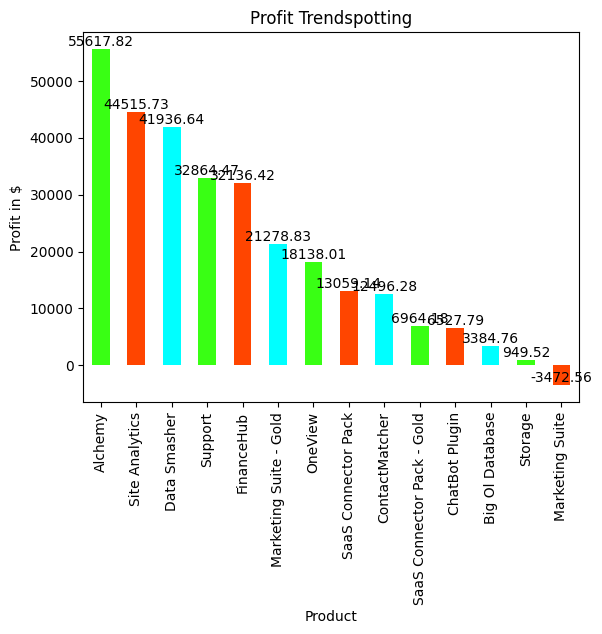

In [38]:
neon_colors = ['#39FF14', '#FF4500', '#00FFFF']

ax_top = product_profit.plot(kind='bar', title='Profit Trendspotting', color=neon_colors)

for i, v in enumerate(product_profit):
    ax_top.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')
plt.ylabel('Profit in $')
plt.show()


>Profit Trendspotting

An overview of the relative contribution of each product to the profit,

In [39]:
product_profit_top = df.groupby('Product')['Profit'].sum().nlargest(3)

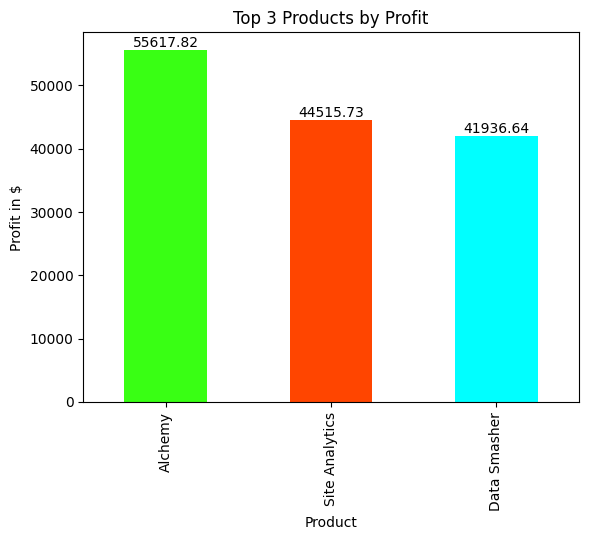

In [40]:
neon_colors = ['#39FF14', '#FF4500', '#00FFFF']

ax_top = product_profit_top.plot(kind='bar', title='Top 3 Products by Profit', color=neon_colors)

for i, v in enumerate(product_profit_top):
    ax_top.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')
plt.ylabel('Profit in $')
plt.show()

> Top 3 Profitable Products Analysis

To represent the profit values of the top 3 products.


In [41]:
product_profit_bottom = df.groupby('Product')['Profit'].sum().nsmallest(3)

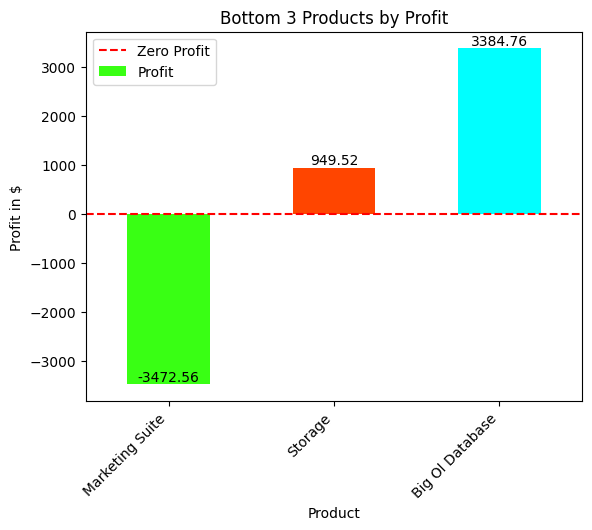

In [42]:
ax_bottom = product_profit_bottom.plot(kind='bar', title='Bottom 3 Products by Profit', color=neon_colors)

ax_bottom.axhline(y=0, color='red', linestyle='--', label='Zero Profit')

for i, v in enumerate(product_profit_bottom):
    ax_bottom.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.xticks(range(len(product_profit_bottom.index)), product_profit_bottom.index, rotation=45, ha='right')

plt.title('Bottom 3 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Profit in $')

ax_bottom.legend()

plt.show()

>Bottom 3 Profitable Products Analysis:

To represent the profit values of the bottom 3 products.

- **Output Insights**

**Insights from Top and Bottom 3 Products by Profit:**

1. **Top 3 Profitable Products: Alchemy, Site Analytics, Data Smasher**
   - These products, including Alchemy, Site Analytics, and Data Smasher, demonstrate strong profitability, suggesting a positive market response and high demand. 
   - The Product Development Team should consider investing in further enhancements, features, or marketing strategies for these products to capitalize on their success.

2. **Bottom 3 Profitable Products: Big Ol Database, Storage, Marketing Suite**
   - Big Ol Database, Storage, and Marketing Suite show lower profitability, indicating potential challenges in market performance.
   - The Product Development Team should evaluate these products to identify areas for improvement, updates, or strategic adjustments to enhance their competitiveness and overall profitability.


# Geographic Sales Analysis

## **Enhancing Products for Global Succes**

---

Purpose:

Make informed decisions to refine and expand product offerings, ensuring they align with the specific needs and preferences of diverse international markets.

In [64]:
ts_bc = df.groupby('Country')['Sales'].sum().reset_index()
country = ts_bc.sort_values(by='Sales')
country

,Country,Sales
33,Qatar,919.9100
18,Iceland,1209.8240
12,Denmark,1270.5300
10,Croatia,1315.5600
37,Slovenia,1603.1360
2,Austria,2865.0200
20,Indonesia,2914.3100
42,Taiwan,4382.4860
28,New Zealand,4783.5220
17,Greece,7292.5240


In [62]:
bot3_countries = ts_bc.sort_values(by='Sales').head(3)
top3_countries = ts_bc.sort_values(by='Sales').tail(3)

In [44]:
top3_countries

,Country,Sales
24,Japan,170188.0458
46,United Kingdom,313169.8810
47,United States,457687.6315


In [45]:
bot3_countries

,Country,Sales
33,Qatar,919.910
18,Iceland,1209.824
12,Denmark,1270.530


> *Top and Bottom Countries:*
  - Identified the top 3 and bottom 3 countries based on total sales.

In [46]:
def get_top_and_bottom_products(data, countries, top_n=3, bottom_n=3):
    products_list_top = []
    products_list_bottom = []
    for country in countries:
        top_products = data[data['Country'] == country].nlargest(top_n, 'Sales')
        bottom_products = data[data['Country'] == country].nsmallest(bottom_n, 'Sales')
        products_list_top.append(top_products)
        products_list_bottom.append(bottom_products)

    return products_list_top, products_list_bottom

In [47]:
top3_countries_data = df[df['Country'].isin(top3_countries['Country'])]
bottom3_countries_data = df[df['Country'].isin(bot3_countries['Country'])]

In [48]:
product_sales_top3 = top3_countries_data.groupby(['Country', 'Product'])['Sales'].sum().reset_index()
product_sales_bottom3 = bottom3_countries_data.groupby(['Country', 'Product'])['Sales'].sum().reset_index()

In [49]:
# Get top and bottom products for each set of countries
top_products_list, bottom_products_list = get_top_and_bottom_products(product_sales_top3, top3_countries['Country'])

In [50]:
print("\nTop 3 Products in Top 3 Countries:")
for products_df in top_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Top 3 Products in Top 3 Countries:

In Japan:
           Product      Sales
11  Site Analytics  28589.568
5       FinanceHub  27156.048
3   ContactMatcher  24803.337

In United Kingdom:
           Product      Sales
19      FinanceHub  47930.577
25  Site Analytics  47502.620
17  ContactMatcher  46396.570

In United States:
           Product      Sales
31  ContactMatcher  73903.400
39  Site Analytics  67964.536
33      FinanceHub  65978.508


In [51]:
print("\nBottom 3 Products in Top 3 Countries:")
for products_df in bottom_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Bottom 3 Products in Top 3 Countries:

In Japan:
           Product     Sales
12         Storage   332.464
2   ChatBot Plugin  2369.528
8          OneView  2407.814

In United Kingdom:
                       Product    Sales
26                     Storage   286.51
24  SaaS Connector Pack - Gold  1776.83
16              ChatBot Plugin  2983.60

In United States:
                       Product    Sales
40                     Storage   479.53
38  SaaS Connector Pack - Gold  3237.34
30              ChatBot Plugin  5495.66


In [52]:
# Get top and bottom products for Bottom countries
top_products_list, bottom_products_list = get_top_and_bottom_products(product_sales_bottom3, bot3_countries['Country'])

In [53]:
print("\nTop 3 Products in Bottom 3 Countries:")
for products_df in top_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])



Top 3 Products in Bottom 3 Countries:

In Qatar:
                   Product   Sales
10  Marketing Suite - Gold  704.76
8           ChatBot Plugin  181.84
9           ContactMatcher   25.90

In Iceland:
          Product    Sales
6  ContactMatcher  761.984
7         Support  447.840

In Denmark:
          Product   Sales
4  Site Analytics  437.85
1    Data Smasher  323.40
5         Support  259.74


In [54]:
print("\nBottom 3 Products in Bottom 3 Countries:")
for products_df in bottom_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Bottom 3 Products in Bottom 3 Countries:

In Qatar:
           Product   Sales
11         Storage    7.41
9   ContactMatcher   25.90
8   ChatBot Plugin  181.84

In Iceland:
          Product    Sales
7         Support  447.840
6  ContactMatcher  761.984

In Denmark:
               Product   Sales
0       ContactMatcher   38.10
2              OneView  101.96
3  SaaS Connector Pack  109.48


> *Top and Bottom Products:*
  - Extracted and displayed the top 3 and bottom 3 products for both top and bottom countries based on sales.

# Industries Sales Analysis

## **Product Ordering Patterns Across Industries.**

---

Purpose:
to identify and analyze the most frequently ordered products within each industry, providing insights into product preferences and trends among different industries.

In [58]:
ipc= df.groupby(['Industry', 'Product']).size().reset_index(name='Order Count')

> *Data Grouping:*
  - Grouped data by industry and product, capturing the order count for each product within different industries.


In [59]:
top3_op = ipc.groupby('Industry').apply(lambda x: x.nlargest(3, 'Order Count')).reset_index(drop=True)

In [60]:
print("Top 3 Most Ordered Products Across Industries:")
top3_op[['Industry', 'Product', 'Order Count']]


Top 3 Most Ordered Products Across Industries:


,Industry,Product,Order Count
0,Communications,ContactMatcher,112
1,Communications,Support,93
2,Communications,SaaS Connector Pack,69
3,Consumer Products,ContactMatcher,187
4,Consumer Products,Support,137
5,Consumer Products,FinanceHub,110
6,Energy,ContactMatcher,236
7,Energy,Support,214
8,Energy,FinanceHub,131
9,Finance,ContactMatcher,402


> *Top 3 Ordered Products:*
  - Identified and presented the top 3 most ordered products across various industries based on the order count.

- **Output Interpretation:**

    1. **Top Products Across Industries:**
    - `ContactMatcher` consistently stands out as the most ordered product across various industries.
    - `Support and FinanceHub` also exhibit strong demand, being among the top three most ordered products in multiple sectors.

    2. **Industry-Specific Preferences:**
    - Varied industries show distinct preferences, with sectors like Communications favoring `SaaS Connector Pack`, and Retail showing interest in `SaaS Connector Pack` as well.
    - The Finance industry demonstrates high demand for `ContactMatcher, Support, and FinanceHub`, emphasizing their significance in this sector.
    

# Corelation Analysis

In [68]:
print("\nCorrelation Analysis:")
for col1, col2 in [('Sales', 'Discount'), ('Sales', 'Profit'), ('Discount', 'Profit')]:
    corr, _ = spearmanr(df[col1], df[col2])
    print(f"{col1} & {col2}: {corr:.2f}")


Correlation Analysis:
Sales & Discount: -0.06
Sales & Profit: 0.52
Discount & Profit: -0.54


- **Correlation Analysis and Results:**
  - Conducted a correlation analysis for top and bottom countries, specifically examining the relationship between sales, discount and profit as well.
    - Utilized the _`Spearman correlation`_ method.
  - Presented the correlation coefficients for sales vs. discount and sales vs. profit in both top and bottom countries.

- **Interpretation:**
  - The correlation between Sales and Discount is -0.06. This indicates a very weak and negative relationship between sales and discounts. It means that as discounts increase, sales tend to slightly decrease, but this relationship is not significant.
  - The correlation between Sales and Profit is 0.52. This figure indicates a fairly strong positive relationship between sales and profit. In other words, as sales increase, profit also tends to increase, and vice versa.
  - The correlation between Discount and Profit is -0.54. This negative value indicates a fairly strong negative relationship between discount and profit. It suggests that when discounts are offered in higher amounts and profits tend to decrease

This analysis indicates that although there is a significant relationship between sales and profit, the relationships between sales/discount and discount/profit are strong enough to be considered in sales strategy and pricing decisions.


In [70]:
data = {'Product': [p.get_text() for p in ax.get_xticklabels()],
        'Sales': [p.get_height() for p in ax.patches]}

sales_df = pd.DataFrame(data)

sales_df


,Product,Sales
0,Alchemy,1099.98000
1,Big Ol Database,599.98500
2,Marketing Suite,306.82025
3,Site Analytics,209.97000
4,FinanceHub,180.98000
5,Marketing Suite - Gold,113.92800
6,Data Smasher,100.00000
7,OneView,82.69000
8,SaaS Connector Pack,41.96000
9,SaaS Connector Pack - Gold,29.04600


In [71]:

data = {'Product': product_profit.index,
        'Profit': product_profit.values}

profit_df = pd.DataFrame(data)

profit_df


,Product,Profit
0,Alchemy,55617.8249
1,Site Analytics,44515.7306
2,Data Smasher,41936.6357
3,Support,32864.4698
4,FinanceHub,32136.4203
5,Marketing Suite - Gold,21278.8264
6,OneView,18138.0054
7,SaaS Connector Pack,13059.1436
8,ContactMatcher,12496.2822
9,SaaS Connector Pack - Gold,6964.1767


From the data provided, several issues can be identified:

1. **Negative Profit Values**: There are products with negative profit values, such as "Marketing Suite" and "Marketing Suite - Gold". This indicates losses from the sales of these products. It may be necessary to review the sales strategy and pricing.

2. **Concerning Correlations**: There is a strong negative correlation between discount and profit (-0.54). This suggests that offering high discounts may have a negative impact on product profitability. It should be considered whether the current discount strategy is effective or requires adjustment.

3. **Low Correlations**: The correlation between sales and discount is only -0.06, indicating a very weak relationship between the two variables. This may suggest that the discount policy has little significant influence on increasing sales.

4. **Sales and Profit Misalignment**: Although there is a significant positive correlation between sales and profit, some products with high sales, such as "Alchemy" and "Big Ol Database", have relatively low profits. This may indicate efficiency issues in operations or high production costs.


# Conclusion

## Sales Patterns

- Strong sales performance observed in high-performing products like **Alchemy**, **Big Ol Database**, and **Marketing Suite**.
- Seasonal peaks noted in December 2020, 2021, and 2022, indicating potential holiday shopping influences.
- Overall upward trend in sales with fluctuations, indicating sustained growth.

## Product Performance

- **Alchemy**, **Big Ol Database**, and **Marketing Suite** are doing well in the market.
- **Saas Connector Pack - Gold**, **ChatBot Plugin**, and **Storage** need improvement.
- Despite the overall positive trend, certain products like **Marketing Suite** incurred losses, signaling areas for improvement or strategic adjustments to enhance profitability.

## Regional Sales

- Despite being smaller markets, countries like **Qatar**, **Iceland**, and **Denmark** contribute to the global sales landscape.
- Top-performing products vary across regions, with **ContactMatcher** leading in the **United States**, **FinanceHub** in the **United Kingdom**, and **Site Analytics** in **Japan**, highlighting regional preferences and market dynamics.

## Industry Demand Analysis

- The finance industry exhibits notable demand for multiple products, particularly **ContactMatcher**, **Support**, and **FinanceHub**, indicating a significant market interest and broad application within the finance sector.

## Correlation Analysis

- Sales and Profit have a moderately strong positive relationship, indicating that higher sales tend to result in increased profits.



# Recommendation


## Pricing Strategy Adjustment

- Evaluate and potentially adjust the pricing strategy for products with negative profit margins, such as **Marketing Suite** and **Marketing Suite - Gold**.
  
## Discount Strategy Review

- Considering the strong negative correlation between discount and profit, review the discount strategy to ensure it positively impacts profitability.

## Operational Efficiency Improvement

- Focus on improving operational efficiency and reducing production costs for high-sales products like **Alchemy** and **Big Ol Database** to increase profitability.

## Resource Allocation for Product Development and Marketing

- Allocate resources towards product development and marketing efforts for underperforming products like **Saas Connector Pack - Gold**, **ChatBot Plugin**, and **Storage** to enhance their competitiveness and drive revenue growth.